In [5]:
# Importing all necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Choosing my features to be apart of my model
features = [
    'station_max_temp_c',
    'weekofyear',
    'station_min_temp_c',
    'station_avg_temp_c',
    'station_precip_mm',
    'station_diur_temp_rng_c',
    'precipitation_amt_mm',
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_dew_point_temp_k',
    'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_tdtr_k',
    'ndvi_se',
    'ndvi_sw',
    'ndvi_ne',
    'ndvi_nw'
]

In [7]:
# Reading in the data
x_train = pd.read_csv('./dengue_features_train.csv', index_col=[0, 1])
y_train = pd.read_csv('./dengue_labels_train.csv', index_col=[0, 1])
x_test = pd.read_csv('./dengue_features_test.csv', index_col=[0, 1])

In [8]:
# San Juan Baseline
x_train_sj = x_train.loc['sj']
x_train_sj = x_train_sj[features]

y_train_sj = y_train.loc['sj']
y_train_sj = y_train_sj['total_cases']

x_train_sj.fillna(method='ffill', inplace=True)

# IQ Baseline
x_train_iq = x_train.loc['iq']
x_train_iq = x_train_iq[features]

y_train_iq = y_train.loc['iq']
y_train_iq = y_train_iq['total_cases']

x_train_iq.fillna(method='ffill', inplace=True)

In [9]:
# Set up models and train
model_sj = XGBRegressor()
model_iq = XGBRegressor()

model_sj.fit(x_train_sj, y_train_sj)
model_iq.fit(x_train_iq, y_train_iq)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [10]:
# Set up test variables for both SJ and IQ to run against the trained-model
x_test_sj = x_test.loc['sj']
x_test_sj = x_test_sj[features]

x_test_iq = x_test.loc['iq']
x_test_iq = x_test_iq[features]

x_test_sj.fillna(method='ffill', inplace=True)
x_test_iq.fillna(method='ffill', inplace=True)

In [11]:
# Run the test set against our model
prediction_sj = list(model_sj.predict(x_test_sj))
prediction_sj = np.rint(prediction_sj).astype(int)
# Make all negative values 0, bc there can be no negative number of cases
prediction_sj = np.clip(prediction_sj, 0, 800)

prediction_iq = list(model_iq.predict(x_test_iq))
prediction_iq = np.rint(prediction_iq).astype(int)
prediction_iq = np.clip(prediction_iq, 0, 800)


In [12]:
# Concatenate the two predictions
predictions = np.concatenate([prediction_sj, prediction_iq])
predictions

array([  7,   5,  28,  28,  13,   2,   1,  36,  20,  15,  10,  21,  31,
        26,  33,  47,  12,  45, 152,  57,  55,  33,  43,  59,  49,  27,
        47,  37,  40,  34,  51,  44,  36,  23,  23,  23,  14,  32,  27,
        33,  16,  17,  20,  16,  13,   7,   4,   4,  15,   7,   8,   7,
        13,   6,  10,  11,  13,  15,  11,   7,  23,  25,  20,  37,  46,
        39,  52,  40,  38,  83,  37,  48,  38,  56,  92,  83,  54,  37,
        46,  50,  15,  55,  29,  28,  22,  33,  24,  24,  31,  33,  33,
        30,  29,  22,  14,  25,  23,  27,   4,  17,   9,   8,   5,  12,
         2,   9,   6,  22,  15,  92,  54,  31,  30,  23,  30,  50,  44,
        46,  25, 110,  65, 121, 125, 118,  83,  46,  27,  37, 118,  25,
        43,  52,  55,  35,  28,  26,  30,  23,  21,  21,  17,  30,  22,
        17,  24,  22,  10,  11,  15,   8,   6,  10,  10,  18,  18,  13,
         7,   8,  10,   9,  11,  10,   9, 107,  86,  44,  38,  77,  17,
       101,  42, 159,  60, 144,  48,  33,  37,  32,  62,  44,  4

In [13]:
# Write the data to the submission file
submission = pd.read_csv('./submission_format.csv', index_col=[0,1])
submission.total_cases = predictions
submission.to_csv('./submissionFile.csv')

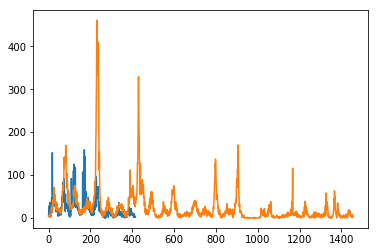

In [21]:
import matplotlib.pyplot as plt
plt.plot(predictions)
y_train_values = list(y_train['total_cases'])
plt.plot(y_train_values)
plt.show()